## Observations and Insights 

In [45]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data=pd.merge(mouse_metadata,study_results, how='left',on=['Mouse ID','Mouse ID'])

# Display the data table for preview
full_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
num_mice=full_data.loc[:,"Mouse ID"].drop_duplicates()
len(num_mice)

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=full_data.loc[full_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
df=full_data[full_data["Mouse ID"].isin(duplicate_mouse) == False]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
new_count=len(clean_df['Mouse ID'].unique())
new_count

NameError: name 'clean_df' is not defined

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#####FILTER 

mean=df['Tumor Volume (mm3)'].mean()
median=df['Tumor Volume (mm3)'].median()
variance=df['Tumor Volume (mm3)'].var()
std=np.std(df['Tumor Volume (mm3)'])
sem=sts.sem(df['Tumor Volume (mm3)'])

print(f'The mean of the tumor volume clean mouse set is {mean}')
print(f'The median of the tumor volume clean mouse set is {median}')
print(f'The variance of the tumor volume clean mouse set is {variance}')
print(f'The Standard Deviation of the tumor volume clean mouse set is {std}')
print(f'The Standard Error Mean of the tumor volume clean mouse set is {sem}')
data={"Tumor Mean": [mean],
     "Tumor Median": [median],
     "Tumor Variance": [variance],
     "Tumor Standard Dev": [std],
     "Tumor SEM":[sem]}

tumor_stats=pd.DataFrame(data)
tumor_stats

The mean of the tumor volume clean mouse set is 50.435293232255326
The median of the tumor volume clean mouse set is 48.933453655
The variance of the tumor volume clean mouse set is 79.46290714557298
The Standard Deviation of the tumor volume clean mouse set is 8.911825830982792
The Standard Error Mean of the tumor volume clean mouse set is 0.20559062186986257


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Dev,Tumor SEM
0,50.435293,48.933454,79.462907,8.911826,0.205591


In [50]:
drug_df=df[['Drug Regimen','Tumor Volume (mm3)']]
drug_df=drug_df.groupby('Drug Regimen')

mean=drug_df.mean()
median=drug_df.median()
variance=drug_df.var()
std=drug_df.std()
sem=drug_df.sem()

data={"Tumor Mean": mean['Tumor Volume (mm3)'],
     "Tumor Median": median['Tumor Volume (mm3)'],
     "Tumor Variance": variance['Tumor Volume (mm3)'], 
    "Tumor Standard Dev": std['Tumor Volume (mm3)'],
    "Tumor SEM":sem['Tumor Volume (mm3)']}

tumor_stats=pd.DataFrame(data)
tumor_stats

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<IPython.core.display.Javascript object>


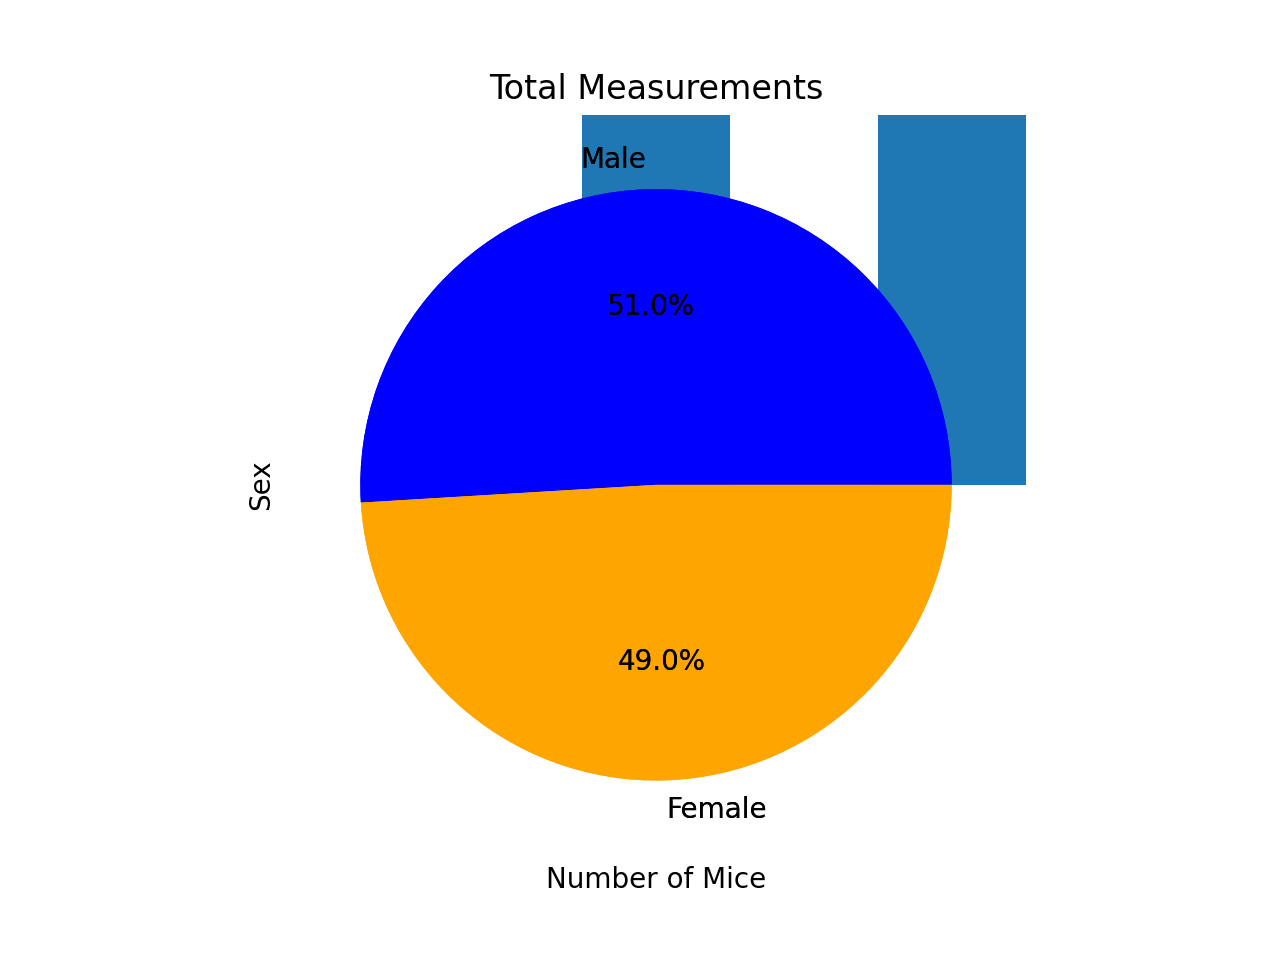

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs=df['Drug Regimen'].value_counts()
y=drugs.values
x=drugs.index

drugs.plot(kind='bar')

plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.title('Total Measurements')
plt.show()


In [53]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_counts=df['Drug Regimen'].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index
#x_ax=np.arange(0,len(y),1)

plt.bar(x_axis,y_axis,alpha=0.5,align='center', width=0.5)
plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.title('Total Measurements')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender=df['Sex'].value_counts()
labels=gender.index
sizes=gender.values
colors=['blue','orange']
explode=[0,0]
gender.plot(kind='pie',colors=colors,labels=labels,autopct='%1.1f%%')
plt.show()


In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=df['Sex'].value_counts()
labels=gender.index
sizes=gender.values
colors=['blue','orange']
explode=[0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time=df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df=pd.merge(max_time,df,on=['Mouse ID','Timepoint'])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ['Capomulin','Ramican','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    print(f'------------------------------------')
    print(f'Info about {x}:')
    print(f' ')
    #treatment_data=merged_df.loc[(merged_df['Drug Regimen']== x)]
    treatment_data=merged_df.loc[(merged_df['Drug Regimen']== x), ['Tumor Volume (mm3)']]
    
###### add subset 
    
    # Determine outliers using upper and lower bounds
    quantiles=merged_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lower_q=quantiles[0.25]
    upper_q=quantiles[0.75]
    iqr=upper_q-lower_q
    #print(f"The lower quartile is: {lower_q}")
    #print(f"The upper quartile is: {upper_q}")
    #print(f"The interquartile range is: {iqr}")
    
    lower_bound=lower_q-(1.5*iqr)
    upper_bound=upper_q+(1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    #outliers=treatment_data.loc[(treatment_data['Tumor Volume (mm3)']<lower_bound)]|[(treatment_data['Tumor Volume (mm3)']>upper_bound)]
    #outliers = treatment_data.loc[(treatment_data['Tumor Volume (mm3)']<lower_bound)] | treatment_data.loc[(treatment_data['Tumor Volume (mm3)']>upper_bound)]
    #outliers=treatment_data[(treatment_data['Tumor Volume (mm3)']<lower_bound) | (treatment_data['Tumor Volume (mm3)']>upper_bound)]
    treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(outliers)
    if len(outliers)>0:
        if len(outliers)>1:
            print(f'There are {len(outliers)} outliers.')
        else:
            print(f'There are {len(outliers)} outliers.')
        display(outliers)
    else:
        print('There are no outliers in this data.')
,    #treatment_data[(treatment_data['Tumor Volume (mm3)']<lower_bound) | (treatment_data['Tumor Volume (mm3)']>upper_bound)]

------------------------------------
Info about Capomulin:
 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


ValueError: Cannot index with multidimensional key

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
